In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [2]:

# ------------------------
# Part 1: IRIS Dataset
# ------------------------

# Load IRIS dataset
iris_data = pd.read_csv('/content/iris.csv')

# Prepare features and labels
X_iris = iris_data.iloc[:, :-1]
y_iris = iris_data.iloc[:, -1]

# Split data into 80% training and 20% testing
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# SVM with Linear Kernel
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = svm_linear.predict(X_test_iris)

# SVM with RBF Kernel
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)

# Evaluate Linear Kernel
print("IRIS Dataset - Linear Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

# Evaluate RBF Kernel
print("\nIRIS Dataset - RBF Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))

IRIS Dataset - Linear Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

IRIS Dataset - RBF Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



Letter-recognition Dataset
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   

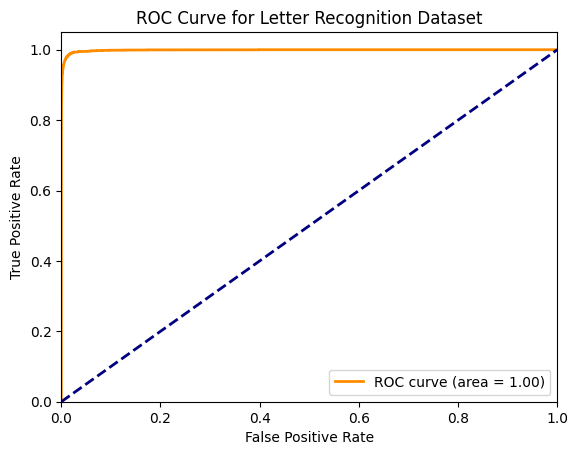


AUC Score: 0.9987979300000001


In [3]:
# ------------------------
# Part 2: Letter-recognition Dataset
# ------------------------

# Load Letter-recognition dataset
letter_data = pd.read_csv('/content/letter-recognition.csv')

# Prepare features and labels
X_letter = letter_data.iloc[:, 1:]  # features
y_letter = letter_data.iloc[:, 0]   # labels

# Split data into 80% training and 20% testing
X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(X_letter, y_letter, test_size=0.2, random_state=42)

# SVM with RBF Kernel (RBF is better for complex data)
svm_letter = svm.SVC(kernel='rbf', probability=True)
svm_letter.fit(X_train_letter, y_train_letter)
y_pred_letter = svm_letter.predict(X_test_letter)

# Evaluate
print("\nLetter-recognition Dataset")
print("Accuracy:", accuracy_score(y_test_letter, y_pred_letter))
print("Confusion Matrix:\n", confusion_matrix(y_test_letter, y_pred_letter))

# ROC Curve and AUC Score
# Since it's multiclass, we binarize the output
y_test_binarized = label_binarize(y_test_letter, classes=np.unique(y_letter))
y_score = svm_letter.predict_proba(X_test_letter)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc = roc_auc_score(y_test_binarized, y_score, average='micro')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Letter Recognition Dataset')
plt.legend(loc="lower right")
plt.show()

print("\nAUC Score:", roc_auc)